In [1]:
# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import joblib

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
general_path = 'Data'
print(list(os.listdir(f'{general_path}/genres_original/')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


# Explore Audio Data

In [3]:
# Importing 1 file
y, sr = librosa.load(f'{general_path}/genres_original/metal/metal.00036.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', len(y)/sr)

y: [ 0.034729    0.07818604  0.0899353  ... -0.17190552 -0.19494629
 -0.19726562] 

y shape: (661504,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.00018140589569


In [4]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [ 0.034729    0.07818604  0.0899353  ... -0.17190552 -0.19494629
 -0.19726562] 

Audio File shape: (661504,)


### 2D Representation: Sound Waves

Text(0.5, 1.0, 'Sound Waves in Metal 36')

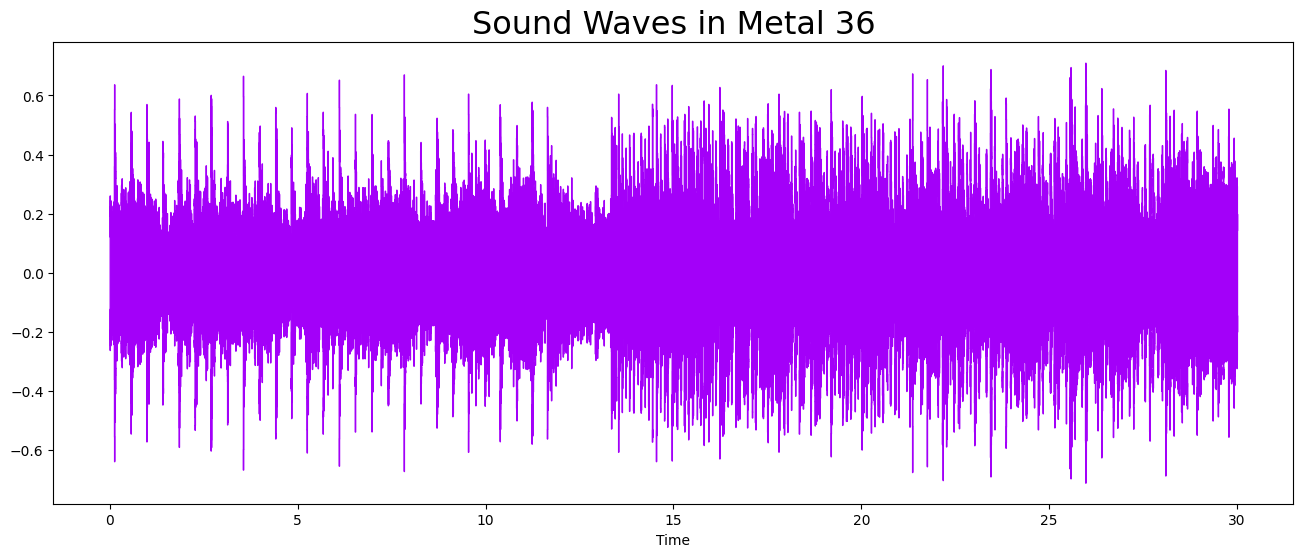

In [5]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F9")
plt.title("Sound Waves in Metal 36", fontsize = 23)

### Fourier Transform

In [6]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 1293)


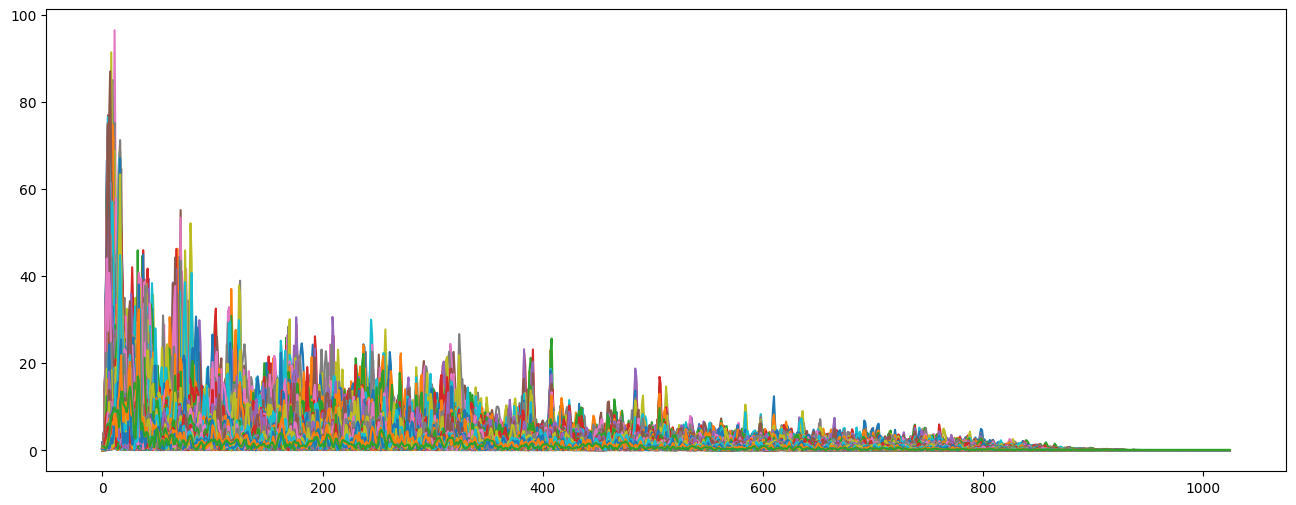

In [7]:
plt.figure(figsize = (16, 6))
plt.plot(D);

### Spectogram

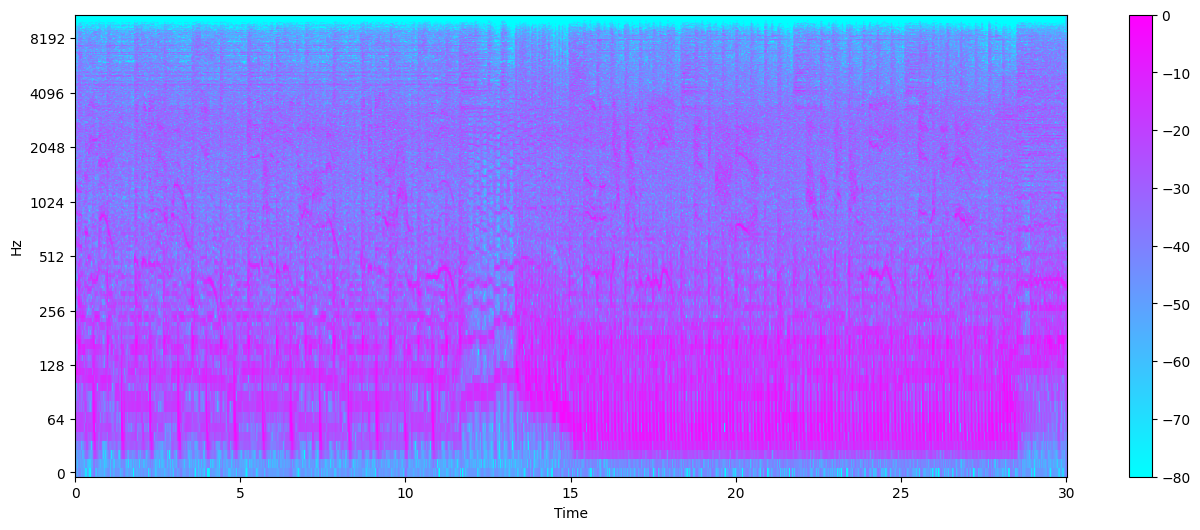

In [8]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log', cmap = 'cool')
plt.colorbar();

#### Mel Spectrogram

Text(0.5, 1.0, 'Metal Mel Spectrogram')

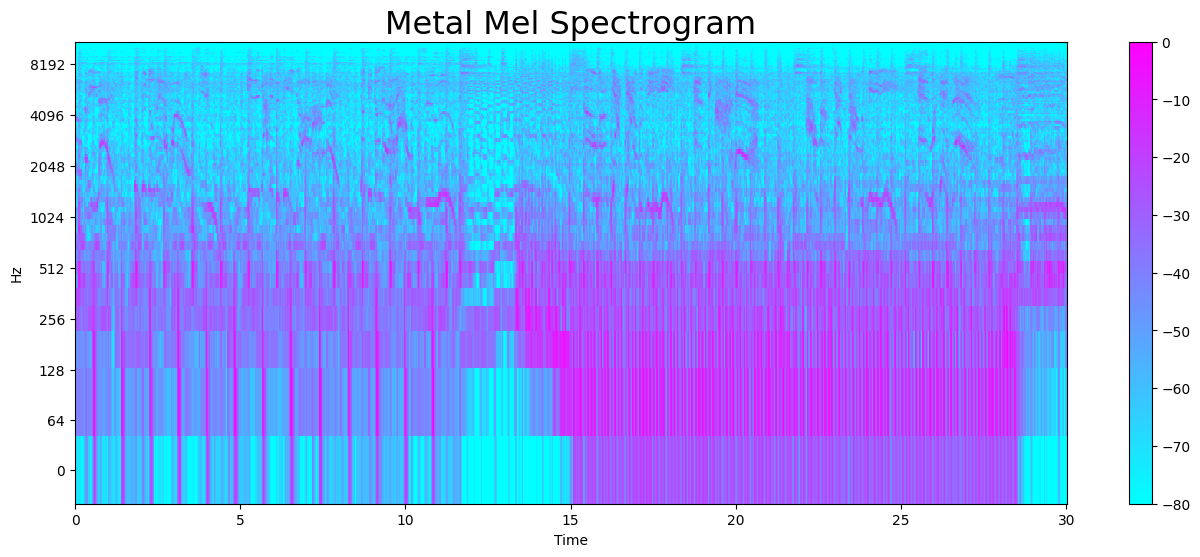

In [9]:
y, sr = librosa.load(f'{general_path}/genres_original/metal/metal.00036.wav')
y, _ = librosa.effects.trim(y)

S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log', cmap = 'cool')
plt.colorbar()
plt.title("Metal Mel Spectrogram", fontsize = 23)

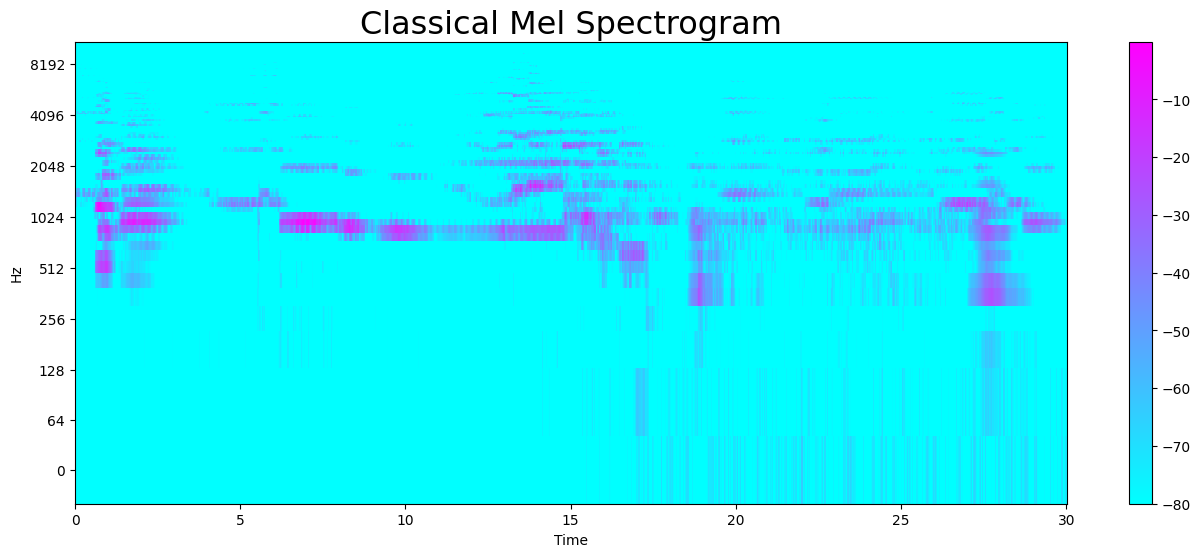

In [10]:
y, sr = librosa.load(f'{general_path}/genres_original/classical/classical.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Classical Mel Spectrogram", fontsize = 23);

# Audio Features

#### Zero Crossing Rate
* the rate at which the signal changes from positive to negative or back.

In [11]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

106295


#### Harmonics and Perceptrual
- Harmonics are characteristichs that human years can't distinguish (represents the sound color)
- Perceptrual understanding shock wave represents the sound rhythm and emotion

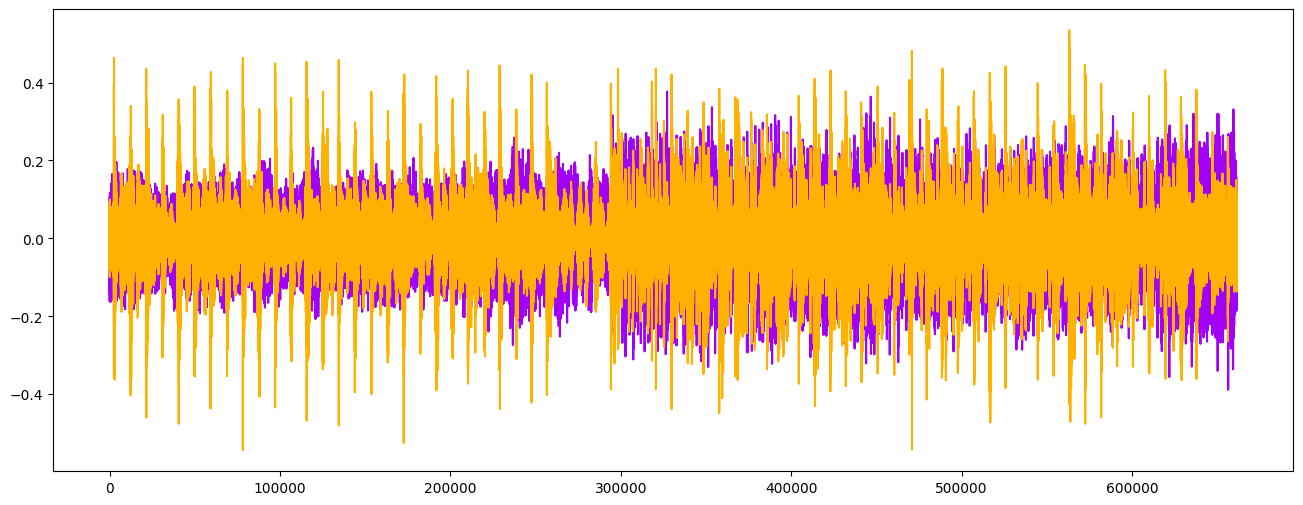

In [12]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');

#### Tempo BMP (beats per minute)
- Dynamic programming beat tracker.

In [13]:
tempo, _ = librosa.beat.beat_track(y=y, sr = sr)
tempo

107.666015625

#### Spectral Centroid
- indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound.

In [14]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(y=audio_file, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Centroids: [2458.75658039 2497.52123036 2442.55096906 ... 2851.6788408  2546.719259
 2486.9634398 ] 

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


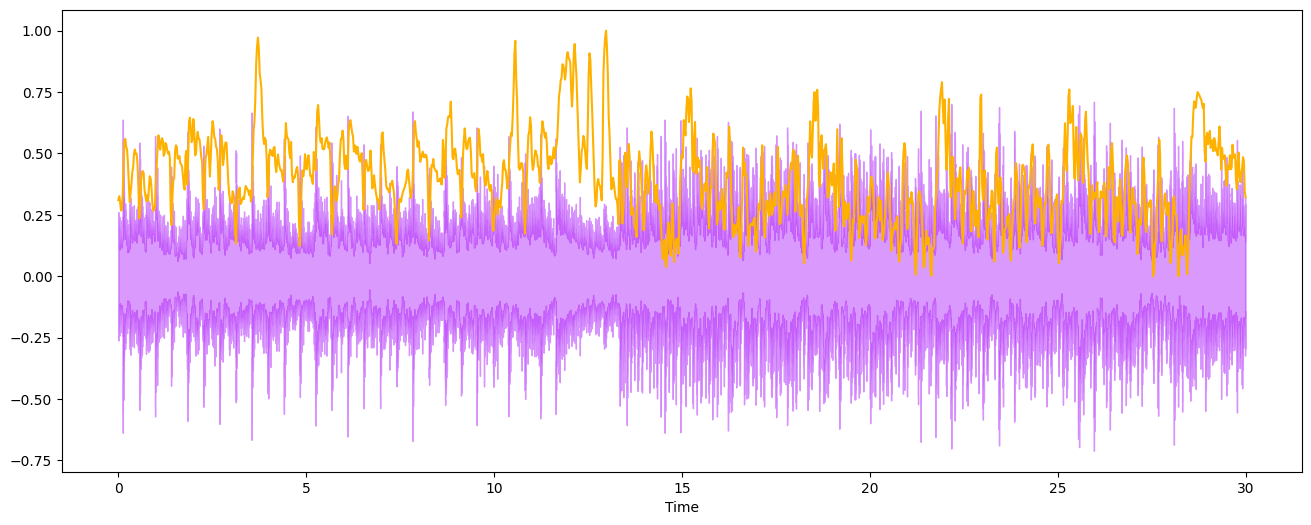

In [15]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y=audio_file, sr=sr, alpha=0.4, color = '#A300F9')
plt.plot(t, normalize(spectral_centroids), color='#FFB100')

#### Spectral Rolloff
- is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies

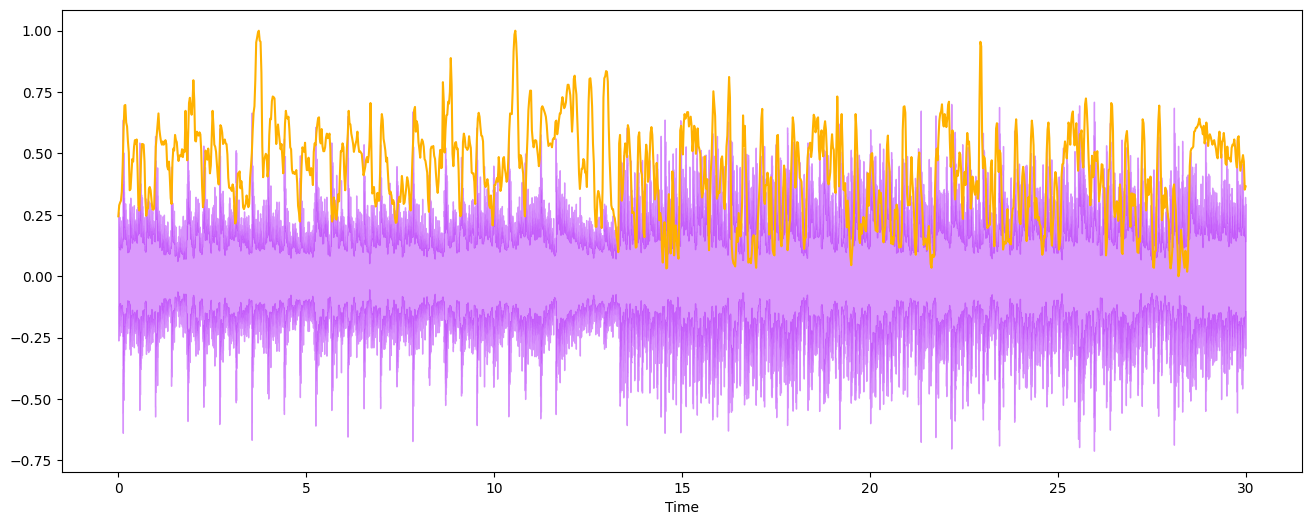

In [16]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(y=audio_file, sr=sr)[0]

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color = '#A300F9')
plt.plot(t, normalize(spectral_rolloff), color='#FFB100')

#### Mel-Frequency Cepstral Coefficients:
- The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

mfccs shape: (20, 1293)


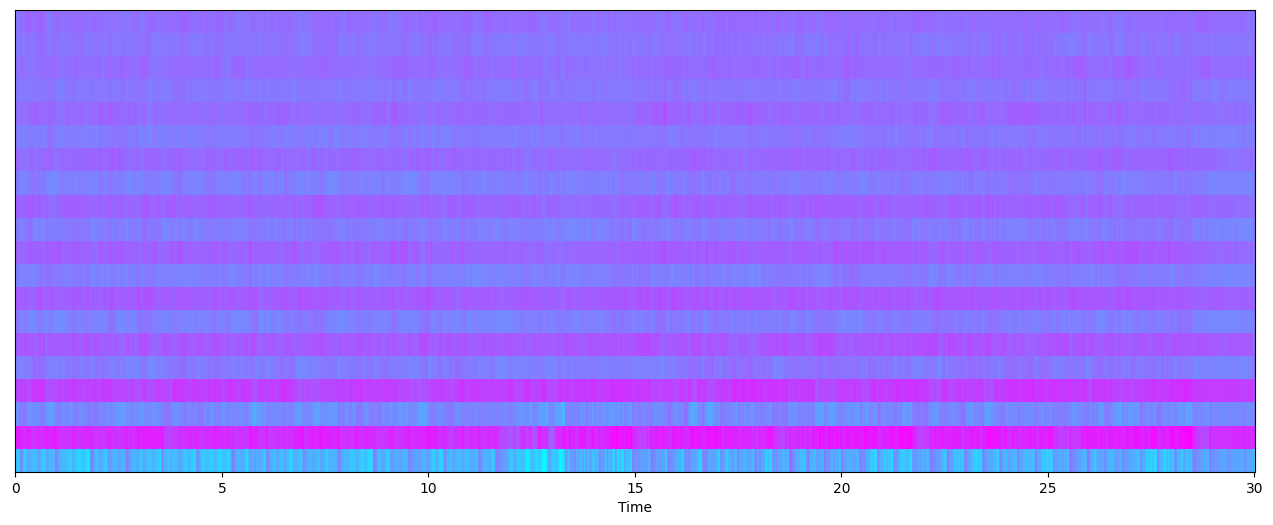

In [17]:
mfccs = librosa.feature.mfcc(y=audio_file, sr=sr)
print('mfccs shape:', mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool')

Mean: 3.2452954e-09 

Var: 1.0


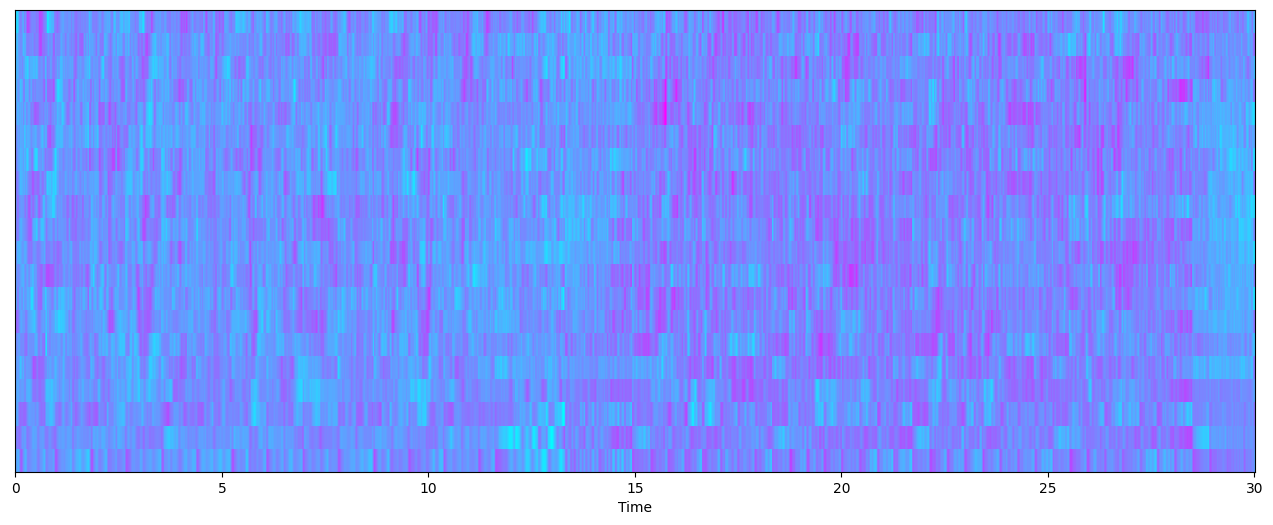

In [18]:
# Perform Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

#### Chroma Frequencies
- Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.

Chromogram shape: (12, 133)


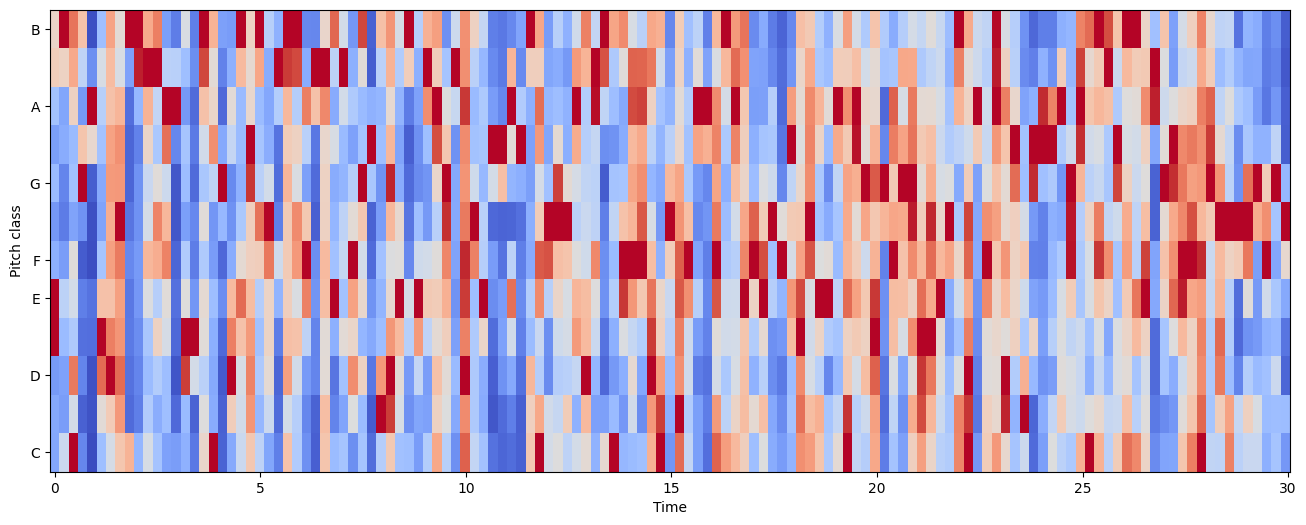

In [19]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# Chromogram
chromagram = librosa.feature.chroma_stft(y=audio_file, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');

# EDA
EDA is going to be performed on the features_30_sec.csv. This file contains the mean and variance for each audio file fo the features analysed above.

So, the table has a final of 1000 rows (10 genrex x 100 audio files) and 60 features (dimensionalities).

In [20]:
data = pd.read_csv(f'{general_path}/features_30_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


#### Correlation Heatmap for feature means

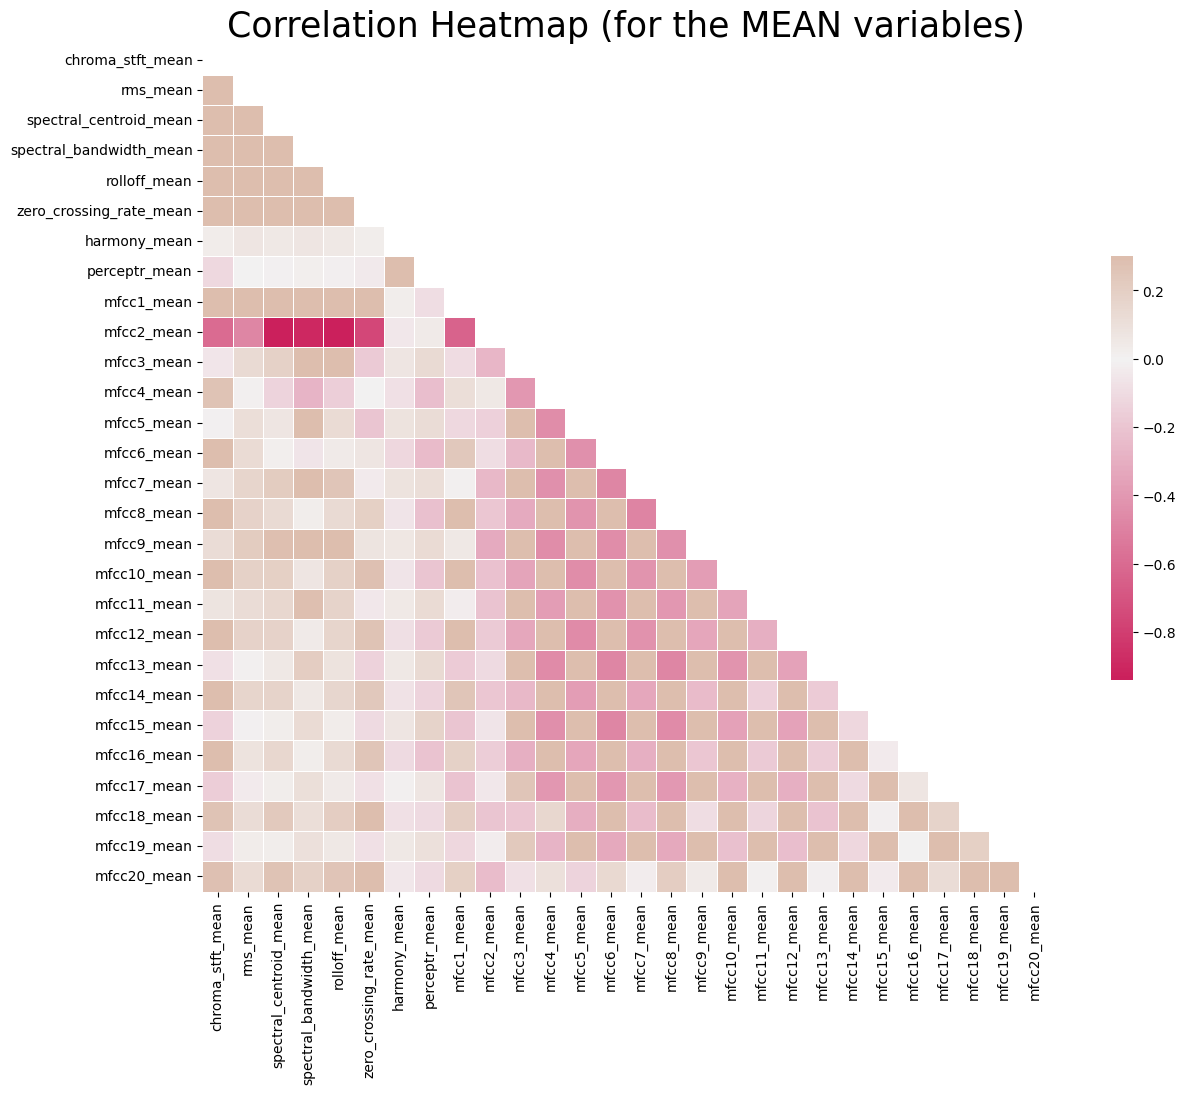

In [21]:
# Computing the Correlation Matrix
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr Heatmap.jpg")

#### Box Plot for Genres Distributions

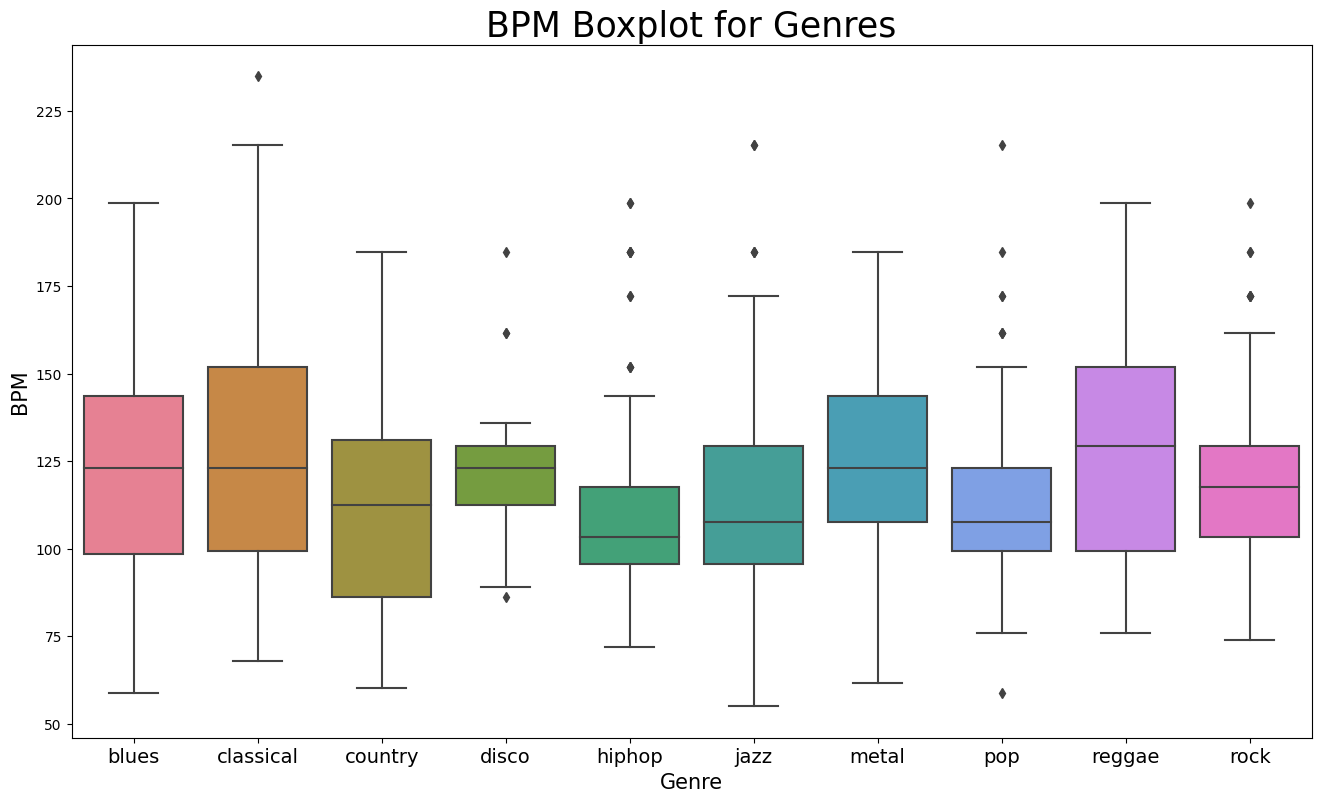

In [22]:
x = data[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM Boxplot.jpg")

### Principal Component Analysis - to visualize possible groups of genres
- Normalization
- PCA
- The Scatter Plot

In [23]:
from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

# 44.93 variance explained

array([0.2439355 , 0.21781804])

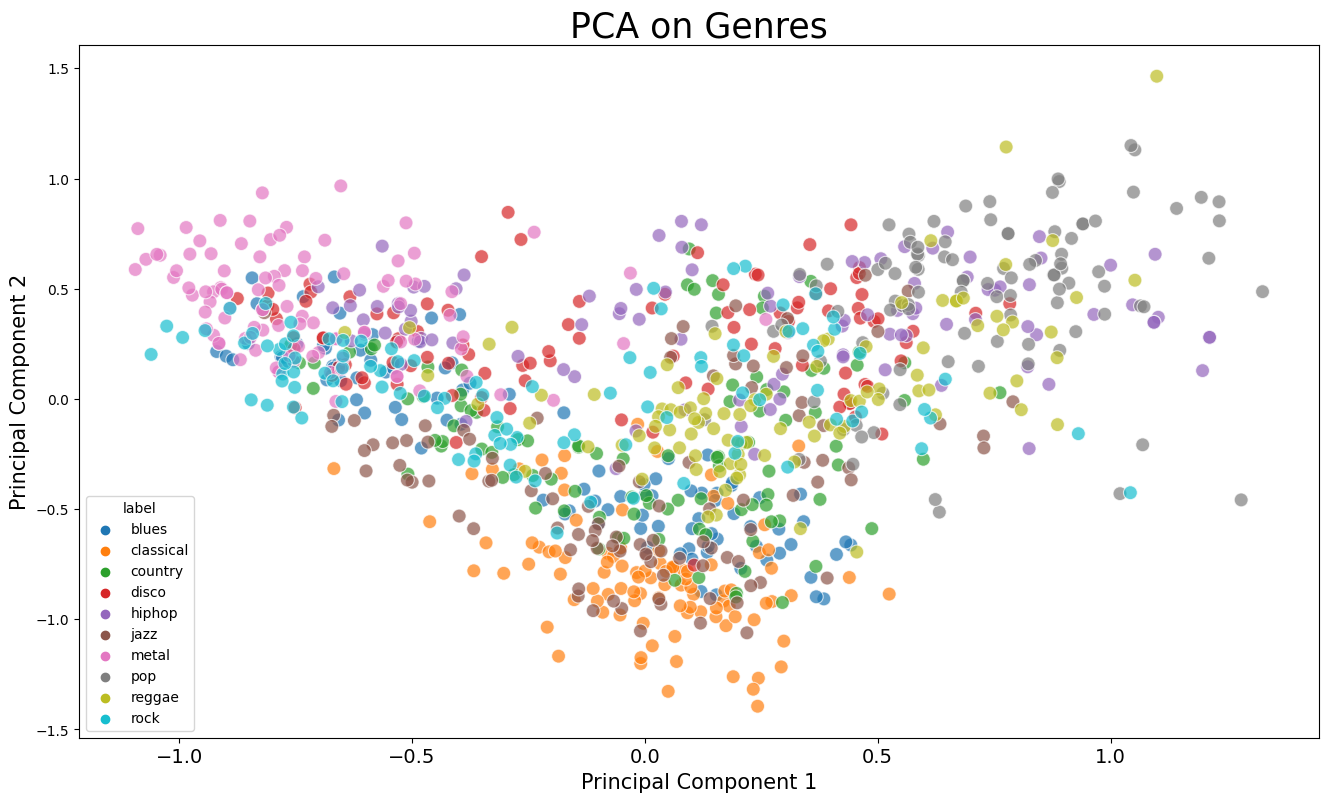

In [24]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

In [25]:
finalDf

,principal component 1,principal component 2,label
0,-0.394827,-0.115015,blues
1,0.050684,-0.271071,blues
2,-0.479969,-0.223169,blues
3,0.015376,-0.440066,blues
4,-0.162281,-0.508224,blues
...,...,...,...
995,-0.754686,-0.037197,rock
996,-0.810911,-0.028770,rock
997,-0.845392,-0.004622,rock
998,-0.235744,-0.372051,rock


# Machine Learning Classification

Libraries

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

Reading in the Data form Dataframe

In [27]:
data = pd.read_csv(f'{general_path}/features_3_sec.csv')
data = data.iloc[0:, 1:] 
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [28]:
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels

#### NORMALIZE X ####

# Normalize so everything is on the same scale. 

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

lbenc = preprocessing.LabelEncoder()
y = lbenc.fit_transform(y)


# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
    


In [29]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [30]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")

Accuracy Naive Bayes : 0.52302 

Accuracy Stochastic Gradient Descent : 0.65916 

Accuracy KNN : 0.83133 

Accuracy Decission trees : 0.65315 

Accuracy Random Forest : 0.81682 

Accuracy Support Vector Machine : 0.75876 

Accuracy Logistic Regression : 0.7012 

Accuracy Neural Nets : 0.67017 

Accuracy Cross Gradient Booster : 0.91792 

Accuracy Cross Gradient Booster (Random Forest) : 0.75676 



Accuracy : 0.91792 



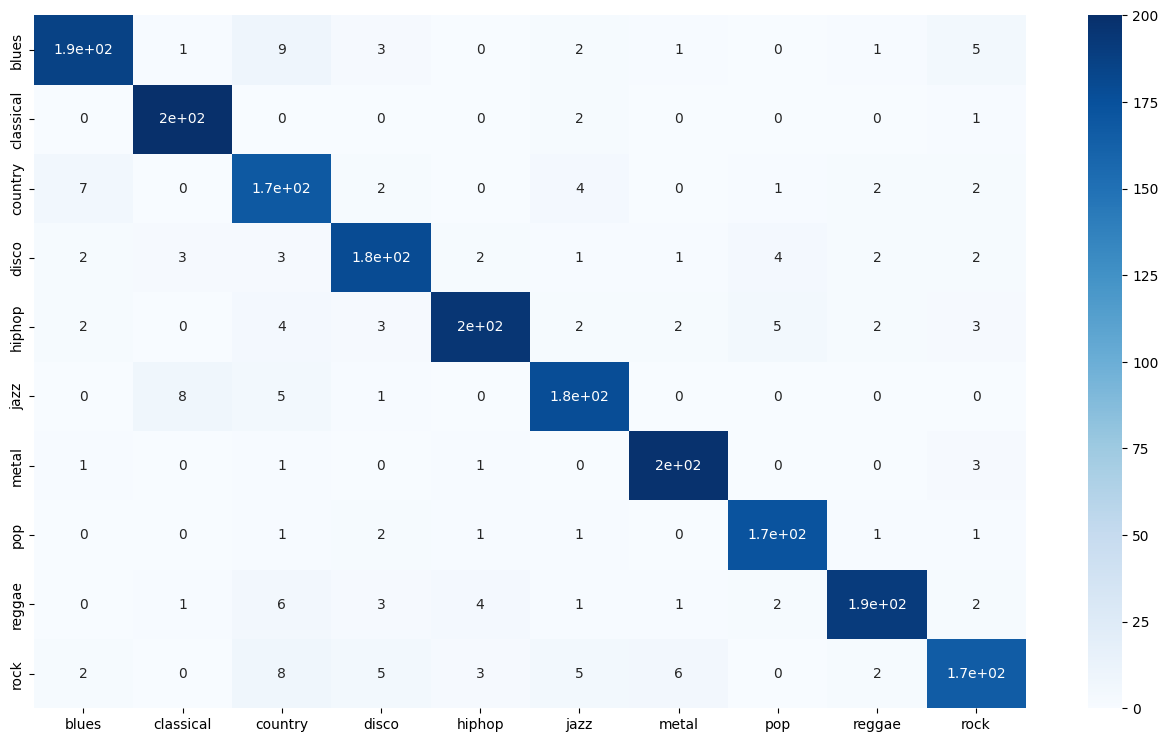

In [31]:
# Final model
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, y_train)
joblib.dump(xgb, "model.dat")
model = joblib.load("model.dat")

preds = model.predict(X_test)

print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.savefig("conf matrix")

 

# Inference

In [32]:
y, sr = librosa.load(f'{general_path}/inference/009.mp3')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', y.shape[0]/sr)

y: [0.         0.         0.         ... 0.00792395 0.00930906 0.        ] 

y shape: (4903415,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 222.37709750566893


In [33]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [-1.0041780e-10  5.9276742e-12  2.4117724e-10 ...  7.9239504e-03
  9.3090618e-03  0.0000000e+00] 

Audio File shape: (4900343,)


In [34]:
tempo, _ = librosa.beat.beat_track(y=audio_file, sr = sr)
tempo

129.19921875

Text(0.5, 1.0, 'Sound Waves in audio file')

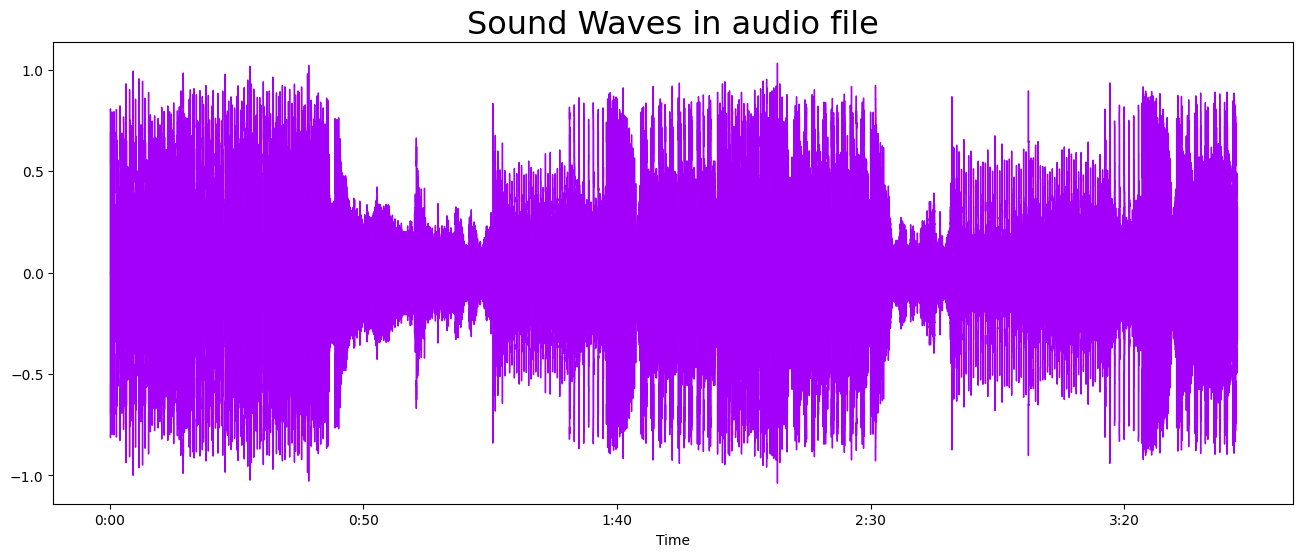

In [35]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F9")
plt.title("Sound Waves in audio file", fontsize = 23)

Shape of D object: (1025, 9571)


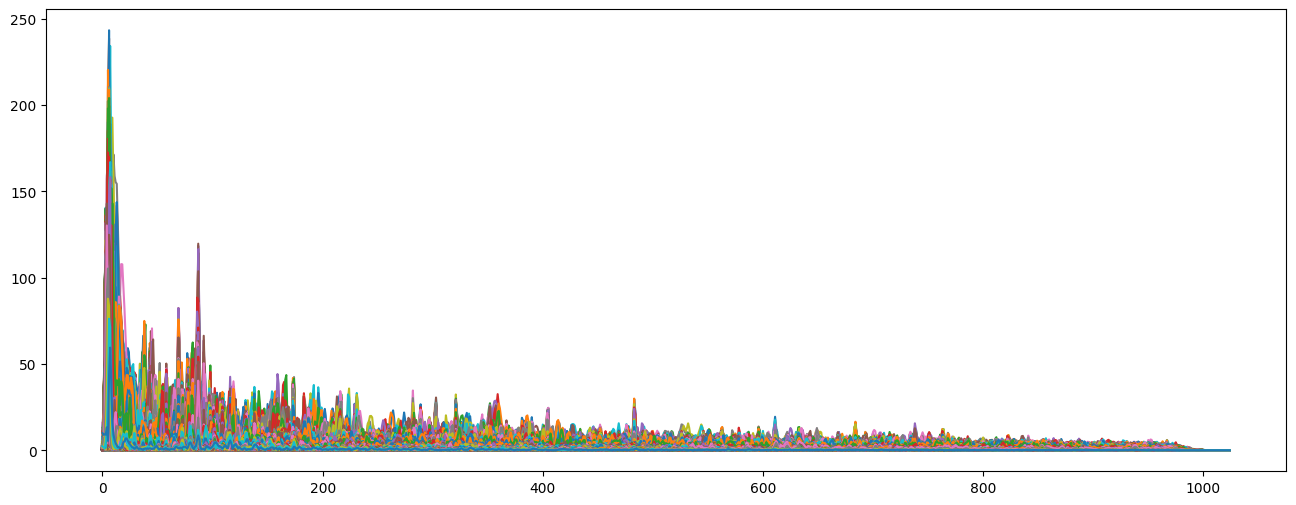

In [36]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

plt.figure(figsize = (16, 6))
plt.plot(D);

Text(0.5, 1.0, 'Mel Spectrogram')

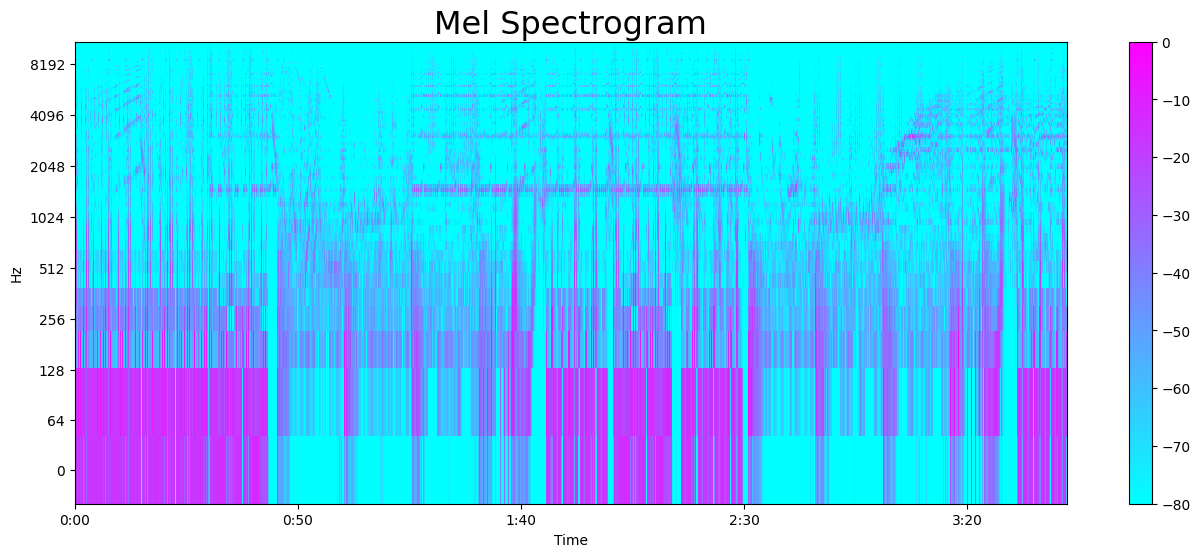

In [37]:
S = librosa.feature.melspectrogram(y=audio_file, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log', cmap = 'cool')
plt.colorbar()
plt.title("Mel Spectrogram", fontsize = 23)

## Feature Extraction from Audio Data

In [38]:
# Audio Features in our 1 song

def get_audio_feature(audio_file_name):
    
    dict={}
    y, sr = librosa.load(f'{general_path}/inference/{audio_file_name}')
    audio_file, _ = librosa.effects.trim(y)
    
    zero_crossing_rate = np.array(librosa.zero_crossings(y=audio_file, pad=False))
    zero_crossing_rate_mean = zero_crossing_rate.mean()
    zero_crossing_rate_var = zero_crossing_rate.var()
    
    S = librosa.feature.melspectrogram(y=audio_file, sr=sr)
    
    spectral_centroids = np.array(librosa.feature.spectral_centroid(y=audio_file, sr=sr)[0])
    spectral_centroid_mean = spectral_centroids.mean()
    spectral_centroid_var = spectral_centroids.var()
    
    spectral_bandwidth = np.array(librosa.feature.spectral_bandwidth(y=audio_file, sr=sr))
    spectral_bandwidth_mean = spectral_bandwidth.mean()
    spectral_bandwidth_var = spectral_bandwidth.var()
    
    rolloff = np.array(librosa.feature.spectral_rolloff(y=audio_file, sr=sr)[0])
    rolloff_mean = rolloff.mean()
    rolloff_var = rolloff.var()
    
    chroma_stft = np.array(librosa.feature.chroma_stft(y=audio_file, sr=sr))
    chroma_stft_mean = chroma_stft.mean()
    chroma_stft_var = chroma_stft.var()
    
    rms = np.array(librosa.feature.rms(y=audio_file, S=S))
    rms_mean = rms.mean()
    rms_var = rms.var()
    
    harmony, perceptr = np.array(librosa.effects.hpss(audio_file))
    harmony_mean = harmony.mean()
    harmony_var = harmony.var()
    perceptr_mean = perceptr.mean()
    perceptr_var = perceptr.var()
    
    mfcc = np.array(librosa.feature.mfcc(y=audio_file, sr=sr))
    
    tempo, _ = librosa.beat.beat_track(y=audio_file, sr = sr)
    
    dict['length'] = len(audio_file)/sr
    dict["chroma_stft_mean"] =  chroma_stft_mean
    dict["chroma_stft_var"] = chroma_stft_var
    dict["rms_mean"] = rms_mean
    dict["rms_var"] = rms_var
    dict["spectral_centroid_mean"] = spectral_centroid_mean
    dict["spectral_centroid_var"] = spectral_centroid_var
    dict["spectral_bandwidth_mean"] = spectral_bandwidth_mean
    dict["spectral_bandwidth_var"] = spectral_bandwidth_var
    dict["rolloff_mean"] = rolloff_mean
    dict["rolloff_var"] = rolloff_var
    dict["zero_crossing_rate_mean"] = zero_crossing_rate_mean
    dict["zero_crossing_rate_var"] = zero_crossing_rate_var
    dict["harmony_mean"] = harmony_mean
    dict["harmony_var"] = harmony_var
    dict["perceptr_mean"] = perceptr_mean
    dict["perceptr_var"] = perceptr_var
    dict["tempo"] = tempo
    
    for idx, feature in enumerate(mfcc,1):
        dict[f'mfcc{idx}_mean'] = feature.mean()
        dict[f'mfcc{idx}_var'] = feature.var()
        
    return dict

In [39]:
dum = get_audio_feature('009.mp3')
print(dum)

{'length': 222.23777777777778, 'chroma_stft_mean': 0.50025415, 'chroma_stft_var': 0.08092892, 'rms_mean': 0.15064885, 'rms_var': 0.006036746, 'spectral_centroid_mean': 2825.3004119466354, 'spectral_centroid_var': 483903.3239610148, 'spectral_bandwidth_mean': 2734.3870694693937, 'spectral_bandwidth_var': 105821.79615755039, 'rolloff_mean': 6063.124319946812, 'rolloff_var': 1654916.1476158353, 'zero_crossing_rate_mean': 0.10971007539676304, 'zero_crossing_rate_var': 0.0976737747531997, 'harmony_mean': 7.091537e-06, 'harmony_var': 0.015990589, 'perceptr_mean': -5.92728e-06, 'perceptr_var': 0.007660768, 'tempo': 129.19921875, 'mfcc1_mean': -83.12703, 'mfcc1_var': 3392.3328, 'mfcc2_mean': 63.3992, 'mfcc2_var': 904.1716, 'mfcc3_mean': -5.472097, 'mfcc3_var': 469.11304, 'mfcc4_mean': 20.696943, 'mfcc4_var': 341.37885, 'mfcc5_mean': 3.7009153, 'mfcc5_var': 202.3875, 'mfcc6_mean': 14.606479, 'mfcc6_var': 173.71158, 'mfcc7_mean': 1.6766167, 'mfcc7_var': 118.16725, 'mfcc8_mean': 10.154921, 'mfcc8

In [40]:
df = pd.DataFrame([dum])
df

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,222.237778,0.500254,0.080929,0.150649,0.006037,2825.300412,483903.323961,2734.387069,105821.796158,6063.12432,...,8.092048,121.310455,1.99466,65.763535,1.063467,44.889538,-2.684723,46.760883,0.091512,37.535633


In [41]:
cols=df.columns
X = df.loc[:]
prediction = model.predict(X)
print(lbenc.inverse_transform(prediction))

['reggae']
